<a href="https://colab.research.google.com/github/kodeu/smartphones_prices/blob/linear_regression/phones_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving smartphones.csv to smartphones (1).csv
User uploaded file "smartphones (1).csv" with length 146107 bytes
Mean Squared Error: 31952.37281670615
Coefficient of Determination (R^2): 0.8269166740377392


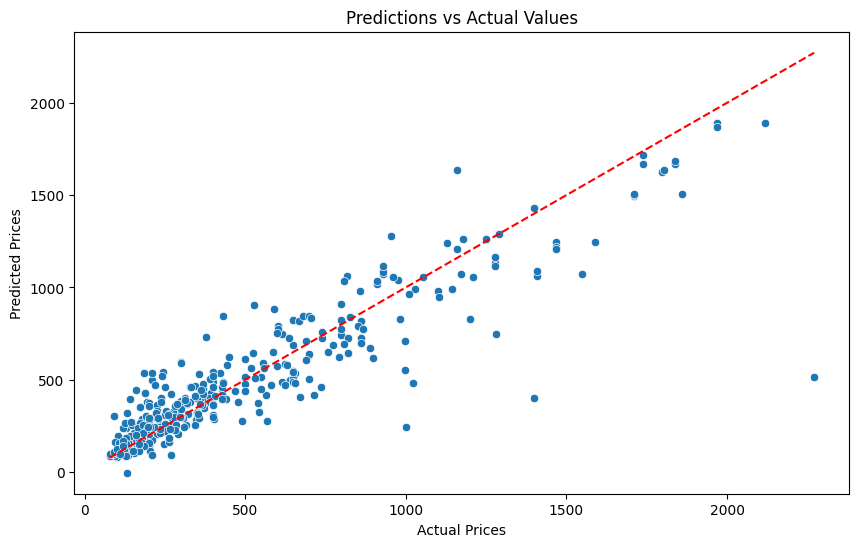

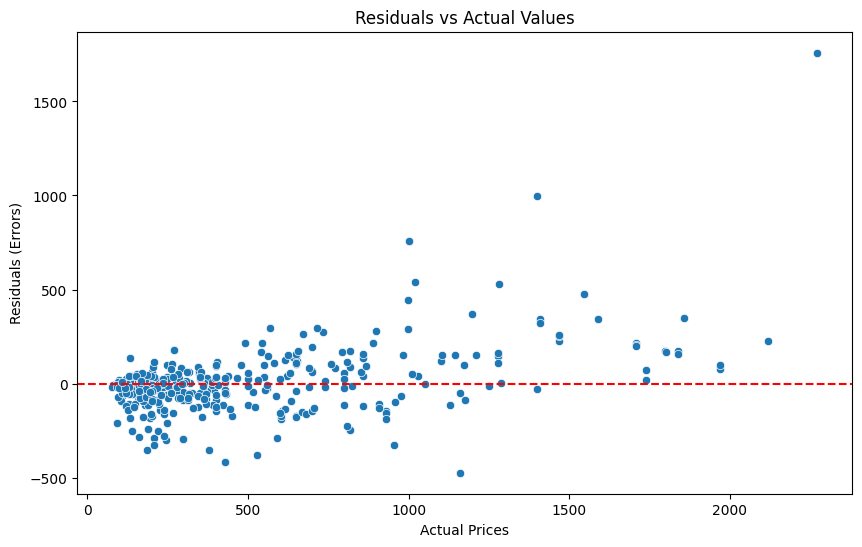

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

X = data.drop('Final Price', axis=1)
y = data['Final Price']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Create transformers for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

#plotting
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(x=y_test, y=y_pred)  # Create a scatter plot
plt.title('Predictions vs Actual Values')  # Set title
plt.xlabel('Actual Prices')  # Set x-axis label
plt.ylabel('Predicted Prices')  # Set y-axis label

# Plot a line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.show()

#plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals (Errors)')
plt.axhline(y=0, color='red', linestyle='--')  # Line at 0 for reference
plt.show()

